# 6.2 Exploring relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

### 1. Importing Visualization Libraries and Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [5]:
matplotlib.__version__

'3.7.1'

In [6]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [7]:
# Define path

path = r'C:\Users\jeanclaude\ACHIEVEMENT 6\02 Data\Prepared Data'

In [8]:
#import data set
df_Football_results = pd.read_csv(os.path.join(path, 'df_football_results_checked.csv'), index_col = False)

In [9]:
df_Football_results.shape

(49019, 14)

In [10]:
df_Football_results.columns

Index(['Unnamed: 0', 'date', 'year', 'home_team', 'away_team', 'home_score',
       'away_score', 'total_goals', 'result', 'home_result', 'away_result',
       'tournament', 'country', 'neutral'],
      dtype='object')

In [11]:
# Check for empty cells
df_Football_results.isnull().sum()

Unnamed: 0     0
date           0
year           0
home_team      0
away_team      0
home_score     0
away_score     0
total_goals    0
result         0
home_result    0
away_result    0
tournament     0
country        0
neutral        0
dtype: int64

### 3. Exploring Relationships

### Correlations:

In [12]:
# Create a correlation matrix using pandas

df_Football_results.corr()

C:\Users\jeanclaude\AppData\Local\Temp\ipykernel_37316\1676512743.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_Football_results.corr()


,Unnamed: 0,year,home_score,away_score,total_goals,neutral
Unnamed: 0,1.000000,0.938683,-0.103592,-0.127441,-0.163649,0.061370
year,0.938683,1.000000,-0.120714,-0.165725,-0.200599,0.077696
home_score,-0.103592,-0.120714,1.000000,-0.091309,0.819804,0.145363
away_score,-0.127441,-0.165725,-0.091309,1.000000,0.495396,-0.176708
total_goals,-0.163649,-0.200599,0.819804,0.495396,1.000000,0.025187
neutral,0.061370,0.077696,0.145363,-0.176708,0.025187,1.000000


In [13]:
# Create a subset of the variables we would like to see for correlations

sub = df_Football_results[['home_score', 'away_score', 'total_goals', 'neutral']]

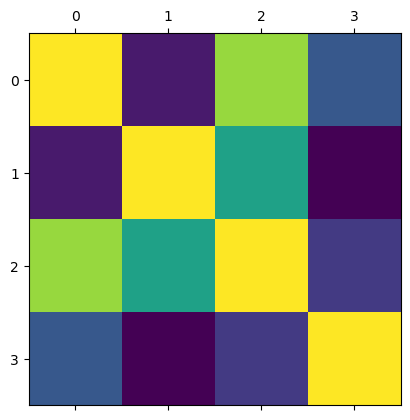

In [14]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

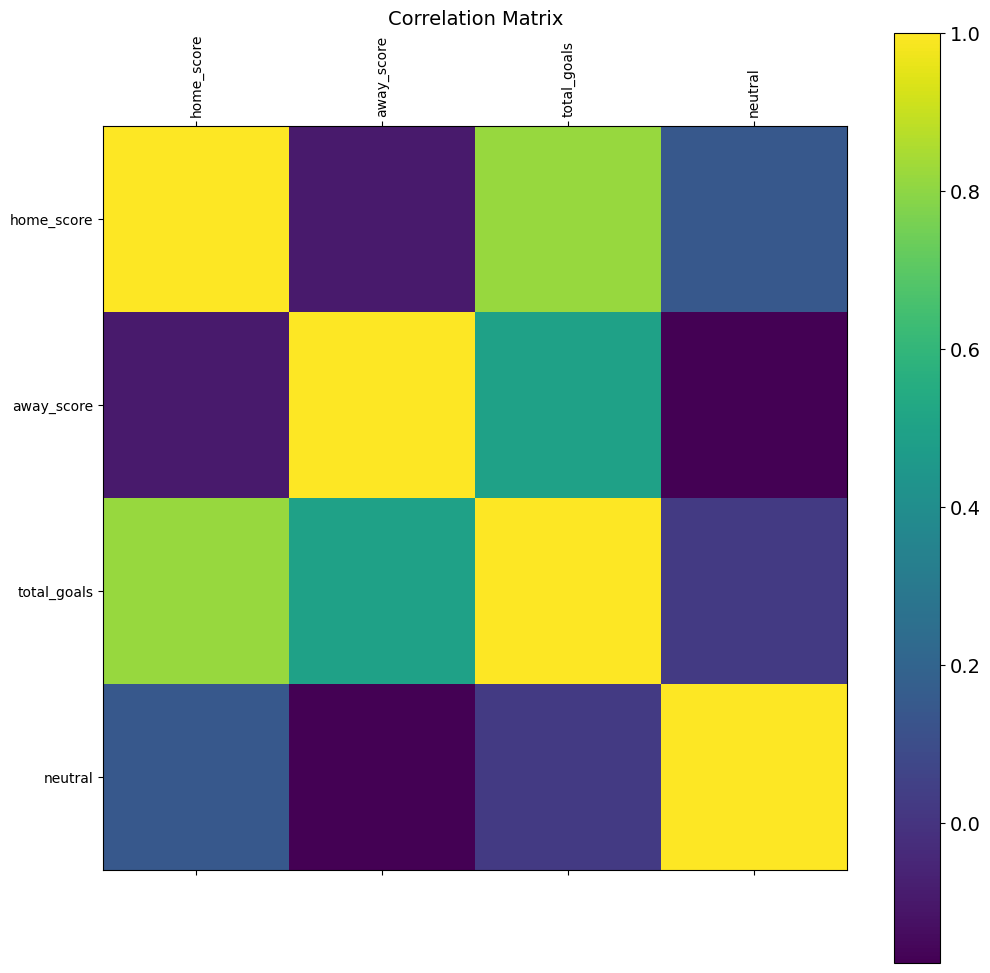

In [15]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(12, 12)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=10, rotation=90) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

#### Create a correlation heatmap using seaborn:

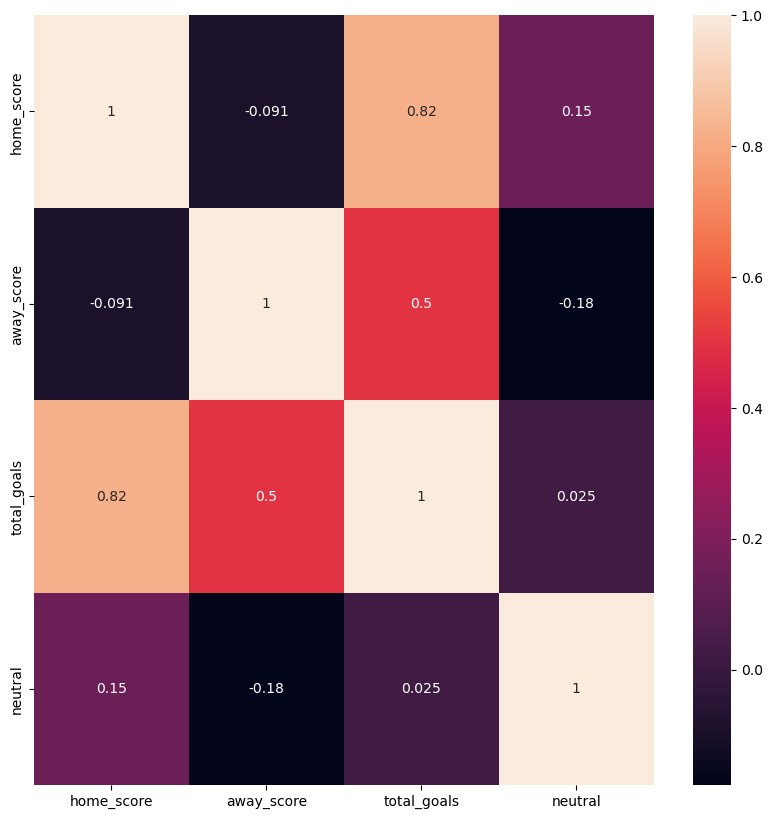

In [16]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

## There is a strong Correlation of 0.82 between home_score and total goals scored

# Scatterplots:

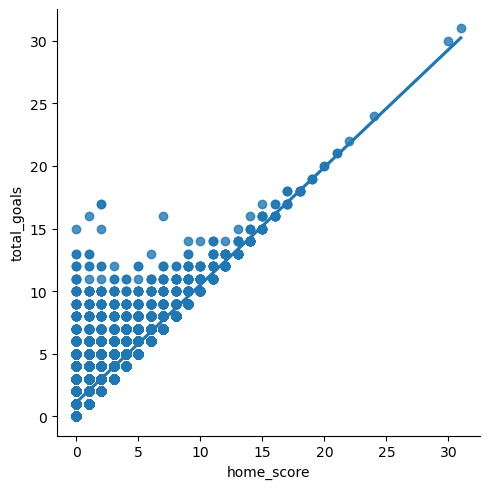

In [17]:
# Create a scatterplot for the "home_score" and "total_goals" columns in seaborn

sns.lmplot(x = 'home_score', y = 'total_goals', data = sub)

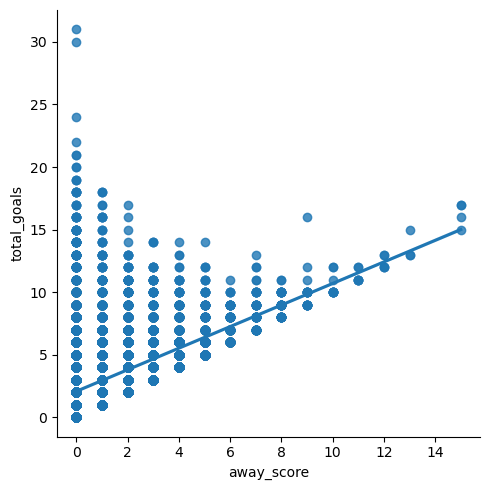

In [18]:
# Create a scatterplot for the "away_score" and "total_goals" columns in seaborn

sns.lmplot(x = 'away_score', y = 'total_goals', data = sub)

## home goals in comparrison to total goals are higher than that of away goals scored. showing there is a clear advantage to play at home

# Pair Plots:

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


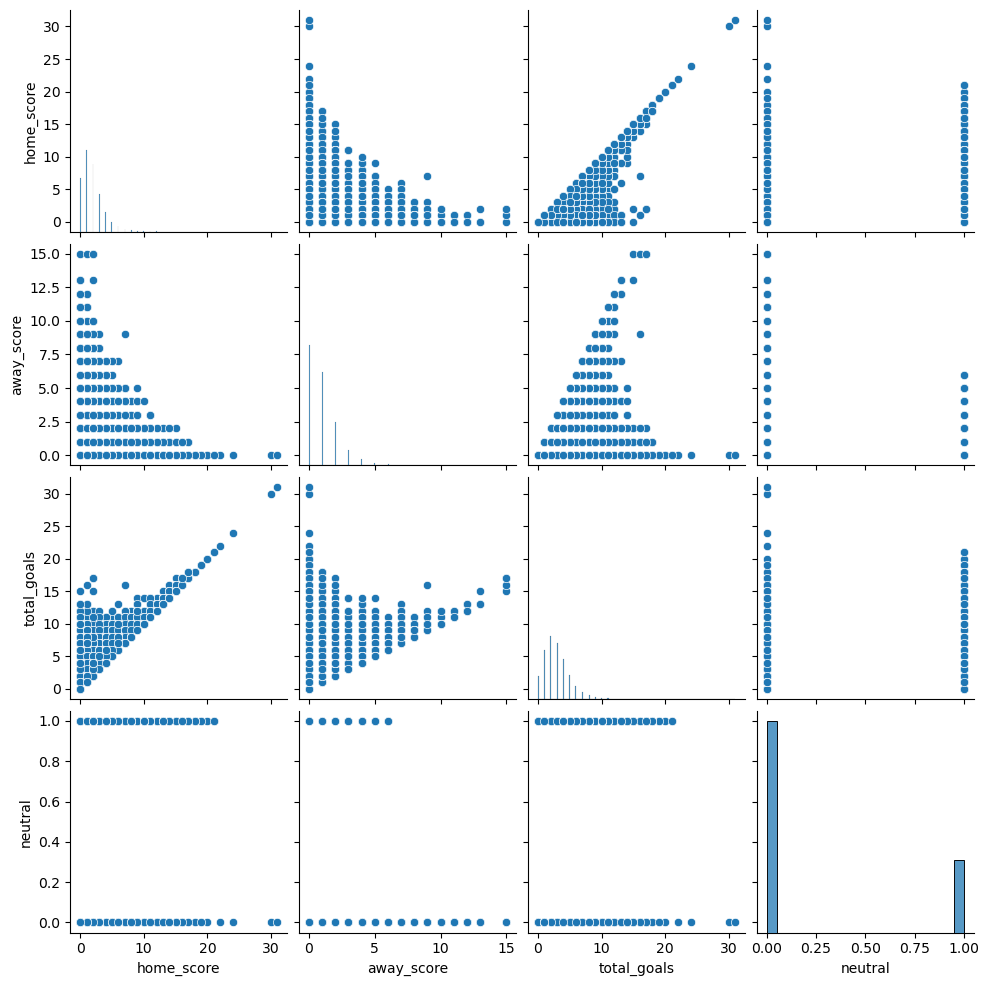

In [19]:
# Create a pair plot 

g = sns.pairplot(sub)

# Categorical Plots:

##### Creating a categorical variable that splits the "total_goals" column into categories

<Axes: xlabel='total_goals', ylabel='Count'>

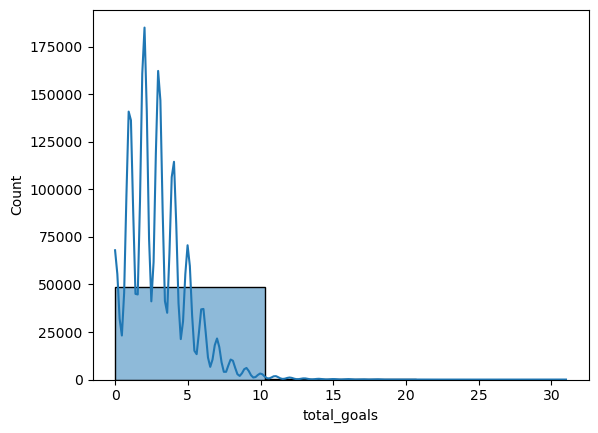

In [20]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(sub['total_goals'], bins = 3, kde = True)

In [21]:
df_Football_results.loc[df_Football_results['total_goals'] <= 1, 'Goal category'] = 'Low Goals'

In [22]:
df_Football_results.loc[(df_Football_results['total_goals'] >= 2) & (df_Football_results['total_goals'] < 4), 'Goal category'] = 'Average Goals'

In [23]:
df_Football_results.loc[df_Football_results['total_goals'] > 3, 'Goal category'] = 'High Goals'

In [24]:
df_Football_results['Goal category'].value_counts(dropna = False)

Average Goals    20500
High Goals       15998
Low Goals        12521
Name: Goal category, dtype: int64

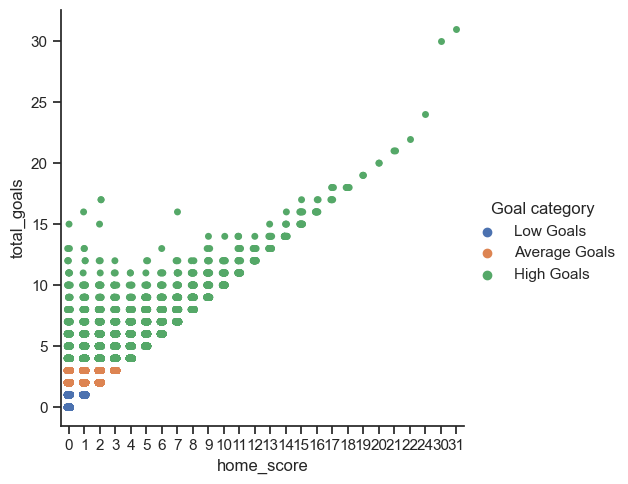

In [25]:
# Create a categorical plot in seaborn using the Goal category created above

sns.set(style="ticks")
g = sns.catplot(x="home_score", y="total_goals", hue="Goal category", data=df_Football_results)

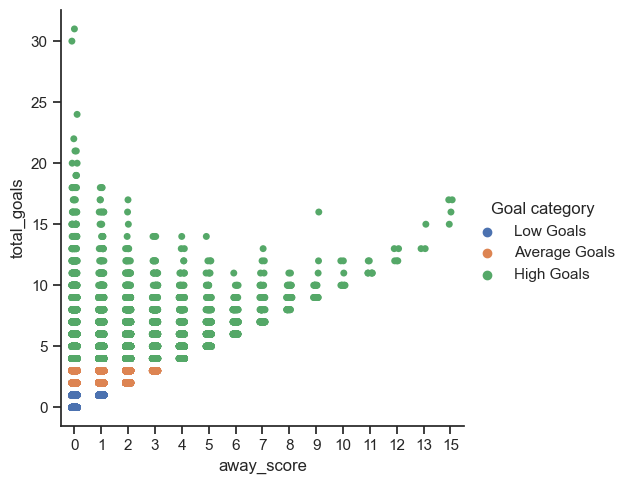

In [26]:
# Create a categorical plot in seaborn using the Goal category created above

sns.set(style="ticks")
g = sns.catplot(x="away_score", y="total_goals", hue="Goal category", data=df_Football_results)

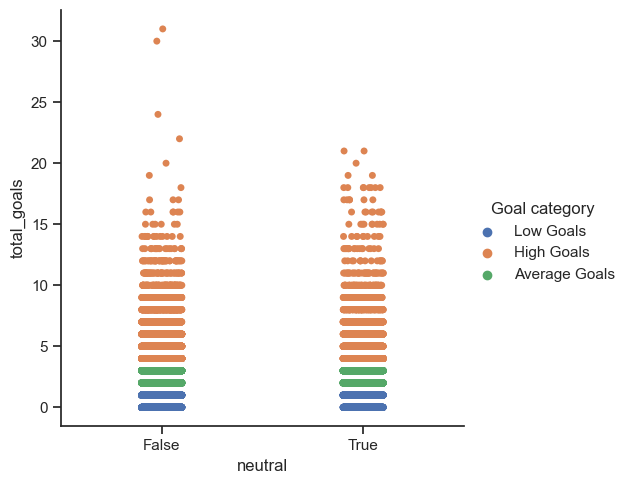

In [30]:
# Create a categorical plot in seaborn using the Goal category created above

sns.set(style="ticks")
g = sns.catplot(x="neutral", y="total_goals", hue="Goal category", data=df_Football_results)

### For both Teams on Neutral ground there does not seem to be a huge differnce of the amount of goals scored in a match. There is a higher amount of home goals scored for a team that is playing on home ground than that of a team playing away

# Hypothesis testing that Playing on home ground can have a positive impact on the result for the home team.